In [2]:
#%matplotlib notebook
import scipy.io as spio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from operator import itemgetter
from scipy.spatial import ConvexHull
import pandas as pd


plt.rc('axes', titlesize=25)

In [6]:
CIJ = spio.loadmat('data/Conectoma.mat')['CIJ_fbden_average']
XYZ = spio.loadmat('data/coords_sporns_2mm.mat')['coords_new']
N = len(XYZ)

In [7]:
xs, ys, zs = zip(*XYZ)
print("Length: {}".format(max(ys) - min(ys)))
print("Width: {}".format(max(xs) - min(xs)))
print("Height: {}".format(max(zs) - min(zs)))
min_x, max_x = min(xs), max(xs)
min_y, max_y = min(ys), max(ys)
min_z, max_z = min(zs), max(zs)
diam_y = max_y - min_y
diam_x = max_x - min_x
diam_z = max_z - min_z
diameter = max(
    diam_y, diam_x, diam_z
)

y0 = int(min_y - (diameter - diam_y) / 2.0)
y1 = int(min_y + diameter)
x0 = int(min_x - (diameter - diam_x) / 2.0)
x1 = int(x0 + diameter)
z0 = int(min_z - (diameter - diam_z) / 2.0)
z1 = int(z0 + diameter)
print(x0, x1, y0, y1, z0, z1)

#x0, x1 = 0, 90
#y0, y1 = 0, 90
#z0, z1 = 0, 90
    

Length: 80.0
Width: 65.0
Height: 49.0
(5, 85, 15, 95, 7, 87)


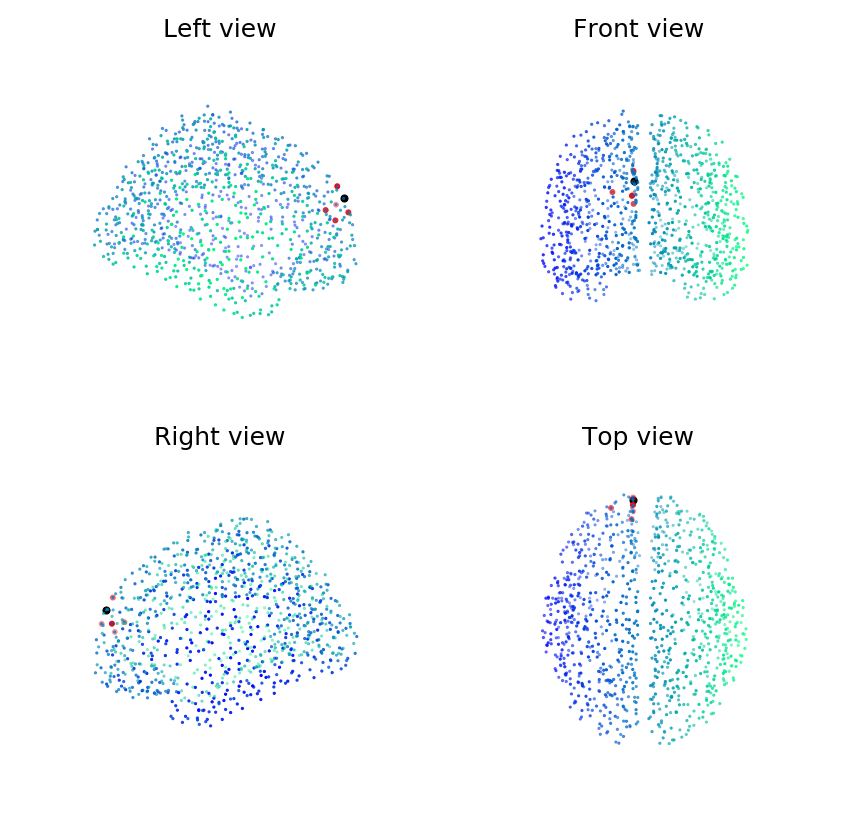

In [33]:
#point = 329
point = 278
point = 90
cmap = 'winter'
x0, y0, z0 = XYZ[point]
color_grad = np.zeros(N)
for i, xyz in enumerate(XYZ):
    x, y, z = xyz
    color_grad[i] = np.sqrt((x - x0) ** 2 + (y - y0) ** 2 + (z - z0) ** 2)
    
# Convex Hull
hull = ConvexHull(XYZ)
plot_tms = True
if plot_tms:
    x, y, z = XYZ[90]
    rx, ry, rz = [x], [y], [z]
    mods = np.array([95, 86, 87, 83, 91])
    px, py, pz = zip(*[XYZ[p] for p in mods])
    

xs, ys, zs = map(np.array, zip(*XYZ))

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0, wspace=0)
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0, hspace=0)#0.025, hspace=0.05)

point_size = 5

ax, ax2, ax3, ax4 = [plt.subplot(gs1[i], projection='3d') for i in range(4)]

for axis in [ax, ax2, ax3, ax4]:
    axis.scatter(xs, ys, zs, s=point_size, cmap=cmap, c=xs)
    if plot_tms:
        axis.scatter(rx, ry, rz, s=10*point_size, color='k')
        axis.scatter(px, py, pz, s=5*point_size, color='r')


ax.set_title('Left view')
ax.view_init(10, 0)

ax2.set_title('Front view')
ax2.view_init(10, -90)

ax3.set_title('Right view')
ax3.view_init(10, 180)

ax4.set_title('Top view')
ax4.view_init(85, -90)

ax.set_xticklabels([])
ax2.set_yticklabels([])
ax3.set_xticklabels([])
ax4.set_zticklabels([])

for axs in [ax, ax2, ax3, ax4]:
    axs.axis('equal')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    axs.set_zticklabels([])
    axs.set_axis_off()
#plt.tight_layout()
#plt.savefig('figures/connectome_3D.png')
plt.show()


In [37]:

ax.view_init(0, 30)
plt.show()

In [ ]:
hull = ConvexHull(XYZ)
hull.vertices

In [17]:
neighbours, _ = zip(*sorted(zip(hull.vertices, color_grad[hull.vertices]), key=itemgetter(1))[:5])
neighbours, ws = zip(*sorted(zip(hull.vertices, color_grad[hull.vertices]), key=itemgetter(1))[:5])
print(neighbours, ws)

((90, 95, 94, 84, 594), (0.0, 3.6055512754639891, 7.5828754440515507, 8.1853527718724504, 8.4557672626438816))


In [ ]:
sorted(zip(np.arange(N), color_grad), key=itemgetter(1))[:10]

In [ ]:
XYZ

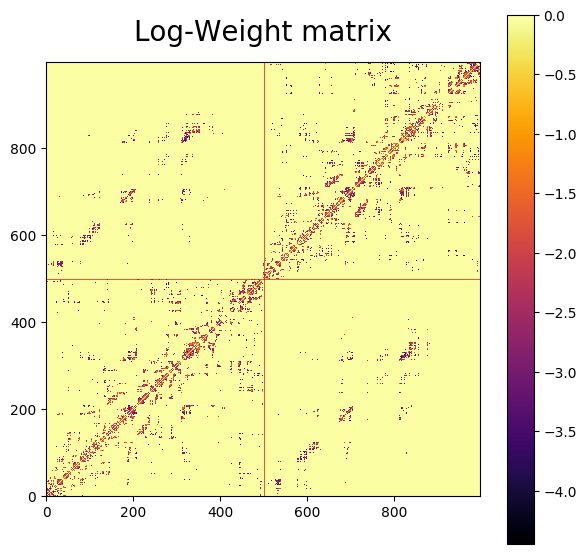

In [138]:
#logCIJ = np.log10(CIJ)
logCIJ = np.ma.log10(CIJ)
logCIJ = logCIJ.filled(0)

fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(111)
im = ax.imshow(logCIJ, cmap='inferno')
ax.plot([0, 998], [500, 500], '-r', linewidth=0.5)
ax.plot([500, 500], [0, 998], '-r', linewidth=0.5)
ax.set_xlim([0, 998])
ax.set_ylim([0, 998])
fig.colorbar(im, ax=ax)
ax.set_title('Log-Weight matrix', fontsize=20, fontweight='normal')
ttl = ax.title
ttl.set_position([.5, 1.03])
plt.savefig('figures/connectome_cij.png')
plt.show()

In [18]:
ns, ws = zip(*sorted(zip(CIJ[90], np.arange(998)), key=lambda x: x[0], reverse=True)[:10])
print(ns, ws)

((0.097461092936200783, 0.040470522165371718, 0.03787922988284962, 0.029173325190685412, 0.027569170095454593, 0.020972714681639332, 0.007022773460384029, 0.0061186484300688182, 0.004384313410172716, 0.0041241850410061696), (95, 86, 87, 83, 91, 85, 84, 81, 89, 581))


In [21]:
CIJ

array([[ 0.        ,  0.03307015,  0.08800526, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03307015,  0.        ,  0.04455116, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08800526,  0.04455116,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.06291059,  0.03163873],
       [ 0.        ,  0.        ,  0.        , ...,  0.06291059,
         0.        ,  0.09239733],
       [ 0.        ,  0.        ,  0.        , ...,  0.03163873,
         0.09239733,  0.        ]])

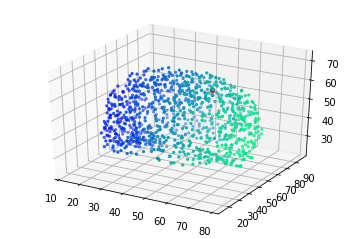

In [11]:
ax = plt.subplot(projection='3d')
ax.scatter(xs, ys, zs, s=point_size, cmap=cmap, c=xs)
x, y, z = XYZ[90]
ax.scatter([x], [y], [z], color='r')

plt.show()